## Introduction librairies sklearn, pandas

* Pandas : manipuler des fichiers csv (tableaux excel), faire des statistiques descriptives (moyenne variance, mediane,histogramme)
* Sklearn : bibliothèque orientée machine learning. Simplifie les tâches récurrentes, telles que séparer les données, créer un modèle, entraîner un modèle.

*Pandas* permet de manipuler des fichiers CSV sous Python de manière simple. Les fichiers csv sont représentés par un "DataFrame". C'est un
objet python sur lesquels on peut effectuer les opérations les plus courantes (calculer la moyenne d'une colonne, etc.)

## Partie 1

### Importer les données

Afficher les colonnes :

In [37]:
import pandas
import matplotlib.pyplot as plt

df=pandas.read_csv("housing.csv")
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

Le data frame a 506 lignes and 14 colonnes:

* `crim`: taux de criminalité par ville
* `zn`: proportion de résidences ( lots > 25,000 sq.ft.)
* `indus`: proportion de zone industrielle par ville
* `chas`: 1 si une rivière passe, 0 sinon
* `nox`: nitrogen oxides concentration (pollution).
* `rm`: nombre moyen de chambres par habitation
* `age`: proportion de maisons occupées construites avant 1940.
* `dis`: distance moyenne (pondérée) des 5 centres d'emplois de Boston.
* `rad`: indice d'accés au périph (plus grand: accès plus rapide au périph)
* `tax`: taxe d'habitation pour $10,000.
* `ptratio`: taux de "pupil-teacher" par ville (?).
* `black`: 1000(Bk - 0.63)^2 ou Bk est la proportion d'afro-américain par ville (base de donnée US)
* `lstat`: pourcentage de personnes en dessous du seuil de pauvreté (lower status).
* `medv`: median house value

### Outils de visualisation

#### Aperçu des données

In [30]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Visualisation des données : statistiques descriptives

Avec *Pandas* et l'objet *DataFrame*, il est facile de visualiser la distribution des variables présentes dans notre jeu de donnée

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

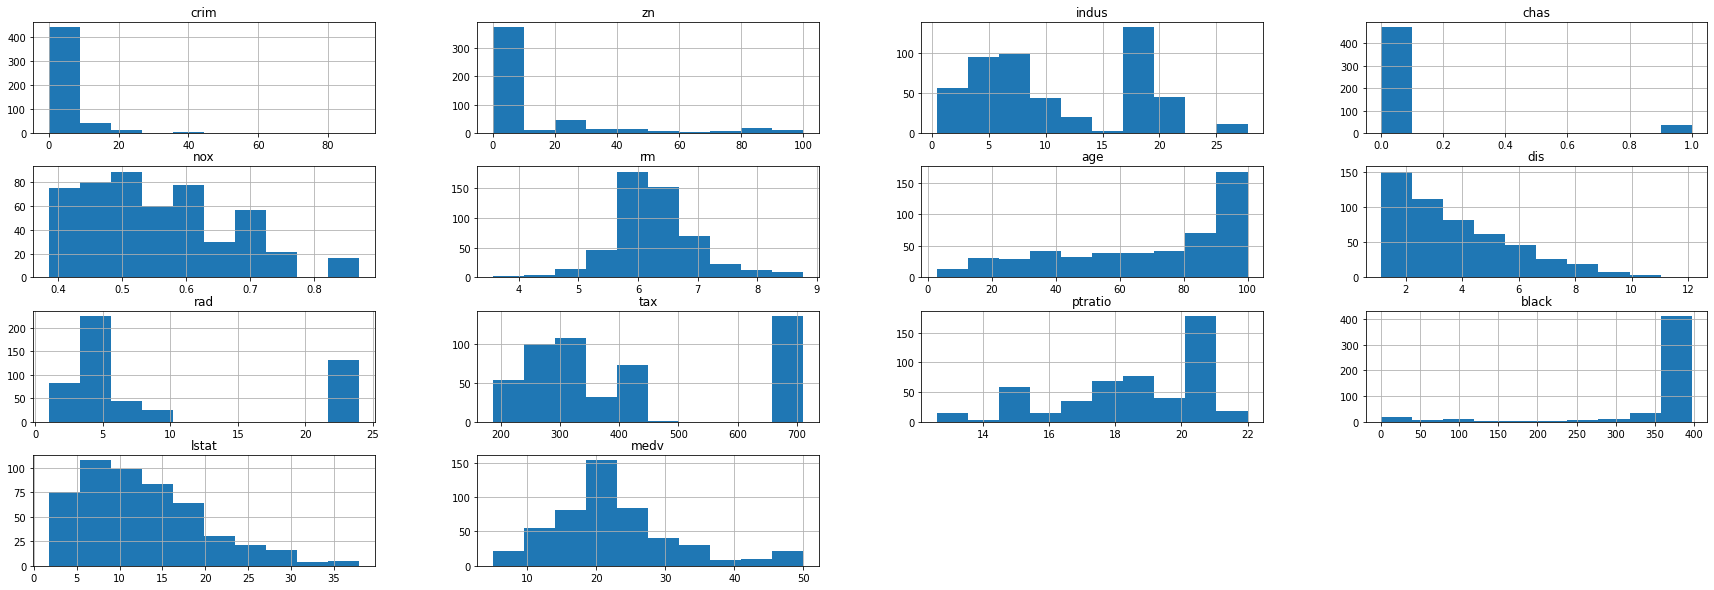

In [31]:
df.hist(figsize=(30,10))

#### Sélectionner une colonne

In [32]:
age = df.age
print(age)

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: age, Length: 506, dtype: float64


#### Statistiques sur la colonne "age"

In [39]:
max_age=age.max()
min_age=age.min()
median_age=age.median()

max_age, min_age, median_age

(100.0, 2.9, 77.5)

#### Visualiser l'impact d'une variable sur une autre

Représenter le « scatter plot » de `crim` contre `medv`

<AxesSubplot:xlabel='crim', ylabel='medv'>

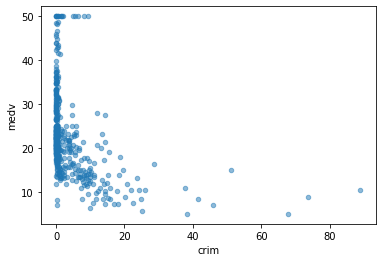

In [34]:
df.plot.scatter(x="crim", y="medv",alpha=0.5)

A faire : essayer de trouver d'autres variables importantes qui pourraient expliquer `medv`

## Partie 2

### Séparer sous la forme (X,Y)

In [41]:
y = df["medv"]  # la variable a prédire
del df["medv"]  # enlever la variable à prédire des prédicteurs
x = df
print("la taille de mon jeu de donnée est {}. Je cherche à expliquer le "
      "prix de vente d'une maison à partir de {} variables" \
      .format(x.shape[0], x.shape[1])
     )

la taille de mon jeu de donnée est 506. Je cherche à expliquer le prix de vente d'une maison à partir de 13 variables


In [42]:
x=x.fillna(-1) # valeurs manquantes
y=y.fillna(-1) # valeurs manquantes

### Création du jeu d'entrainement et du jeu de test

Nous devons maintenant découper notre jeu d'entrainement. Pour cela, j'utilise la fonction train_test_split fournie par sklearn. Le paramètre test_size me
permet de choisir la proportion de mon jeu de test. En règle général, cette valeur est comprise entre 0.2 et 0.3.

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

### Création d'un modèle (regréssion lineaire)

Nous allons maintenant essayer d'expliquer la variable `y` (le prix de la maison) en fonction des variables `x`. Le modèle est de la forme:

$y=A∗x+b$

$Prix = β_{CRIM} ∗ X_{CRIM} + β_{ZN} ∗ X_{ZN} + β_{INDUS} ∗ X_{INDUS} + . . .$

Où les coefficients du vecteur `A` seront ceux qui « expliquent » le mieux les données. Par exemple, on pourrait faire l'hypothèse que la variable "CRIM" (taux de criminalité de la zone) a un impact négatif sur le prix des maisons. On peut prévoir un coefficient négatif devant cette variable.

In [44]:
import sklearn.linear_model

model=sklearn.linear_model.LinearRegression()
model.fit(X_train,Y_train) # Attention ! Il ne faut surtout pas mettre les données de test dans la fonction fit

LinearRegression()

In [45]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [46]:
model.coef_

array([-1.04102711e-01,  4.90626794e-02,  6.21512695e-02,  2.86810117e+00,
       -1.93873145e+01,  3.79077674e+00, -5.84954108e-03, -1.51717242e+00,
        2.91559657e-01, -1.38268303e-02, -9.23391716e-01,  7.66881413e-03,
       -4.89825047e-01])

Interpréter la valeur de ces coefficients. Sont-ils crédibles ?

In [48]:
for i in range(len(df.columns)):
    print("Le coefficient de {} est {}".format(df.columns[i],model.coef_[i]))

Le coefficient de crim est -0.10410271073090434
Le coefficient de zn est 0.049062679430175275
Le coefficient de indus est 0.062151269527917476
Le coefficient de chas est 2.8681011679899955
Le coefficient de nox est -19.387314524408215
Le coefficient de rm est 3.7907767364326
Le coefficient de age est -0.00584954107719056
Le coefficient de dis est -1.5171724184269586
Le coefficient de rad est 0.29155965741915785
Le coefficient de tax est -0.013826830285153205
Le coefficient de ptratio est -0.9233917158112945
Le coefficient de black est 0.007668814132971805
Le coefficient de lstat est -0.48982504712777936


## Evaluation du modèle

Comment savoir si notre modèle est bon ou pas ? Il faut un critère de comparaison. Par exemple l'écart quadratique moyen pour une regression, le taux de bonnes prédictions pour une classification

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
prediction_train=model.predict(X_train)
erreur_train=mean_squared_error(Y_train,prediction_train)
print(erreur_train)

Et sur le jeu d'entrainement ?

In [ ]:
prediction_test=model.predict(X_test)
erreur_test=mean_squared_error(Y_test,prediction_test)
print(erreur_test)

L'objectif est le suivant : avoir la plus petite erreur possible sur le jeu d'entrainement.

#### Interpréter l'erreur

cette erreur est elle acceptable ? Notre modèle est il bon ? Nous avons ici considéré l'erreur moyenne au carré, peut être qu'il faut scorer le modèle avec une erreur plus compréhensible.

In [ ]:
erreur_train=mean_absolute_error(Y_test,prediction_test)
print(erreur_train)

La contrainte est la suivante : avoir une erreur similaire sur le jeu de test (contrôle d'overfitting)

### Visualisation des résultats

In [ ]:
import matplotlib.pyplot as plt
errors=Y_test-prediction_test

In [ ]:
plt.figure()
plt.hist(errors, bins=50)
plt.show()

* Comment calculer le biais ?
* Analyser l'histogramme des erreurs

In [ ]:
errors.mean() # biais de 2295